## Problem Statement:
## Predict how likely it is that the people will take an H1N1 flu vaccine using Logistic Regression


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss

# data preprocessing

In [2]:
data = pd.read_csv('h1n1_vaccine_prediction.csv')
pd.set_option('display.max_columns',None)

In [3]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [10]:
data.shape

(26707, 34)

In [4]:
data.isna().sum()/len(data) * 100

unique_id                     0.000000
h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                      

In [5]:
data.duplicated().sum()

0

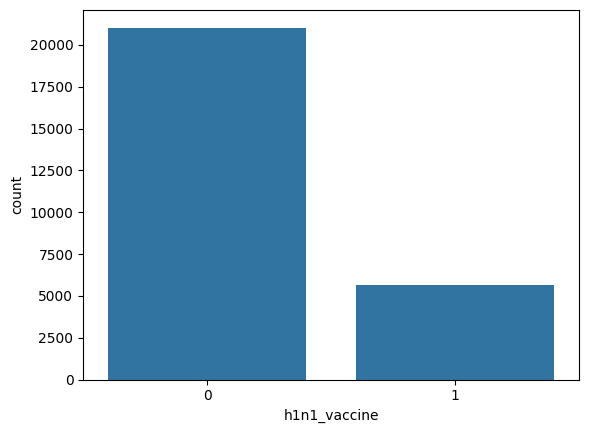

In [6]:
# ouptput column
sns.barplot(data['h1n1_vaccine'].value_counts())
plt.show()
# 1 -- yes
# 0 -- no

### output column is imbalanced

In [7]:
num_col = data.select_dtypes('number')
cat_col = data.select_dtypes('object')

In [8]:
num_col.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0


In [9]:
cat_col.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


## cat_col cleanning

In [10]:
age_mapping = {
    '65+ Years': 'senior',
    '55 - 64 Years': 'middle_aged',
    '45 - 54 Years': 'experienced',
    '35 - 44 Years': 'young_adult',
    '18 - 34 Years': 'young'
}

data['age_bracket'] = data['age_bracket'].replace(age_mapping)


In [11]:
qualification_map = {
    'College Graduate' : 'Graduate',
    'Some College' : 'in_graduation',
    '12 Years' : 'HSC',
    '< 12 Years' : 'SSC'
}

data['qualification'] = data['qualification'].replace(qualification_map)

In [12]:
income_map = {
    '<= $75,000, Above Poverty' : 'Rich',
    '> $75,000' : 'Middle_class',
    'Below Poverty': 'Poor'
}

data['income_level'] = data['income_level'].replace(income_map)

In [13]:
census_map = {
    'MSA, Not Principle  City' : 'Not_principle_city',
    'MSA, Principle City' : 'principle_city',
    'Non-MSA': 'Non_Msa'
}
data['census_msa'] = data['census_msa'].replace(census_map)

In [14]:
cat_col_clean = data.select_dtypes('object')

In [15]:
cat_col_clean.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,middle_aged,SSC,White,Female,Poor,Not Married,Own,Not in Labor Force,Non_Msa
1,young_adult,HSC,White,Male,Poor,Not Married,Rent,Employed,Not_principle_city
2,young,Graduate,White,Male,Rich,Not Married,Own,Employed,Not_principle_city
3,senior,HSC,White,Female,Poor,Not Married,Rent,Not in Labor Force,principle_city
4,experienced,in_graduation,White,Female,Rich,Married,Own,Employed,Not_principle_city


# EDA

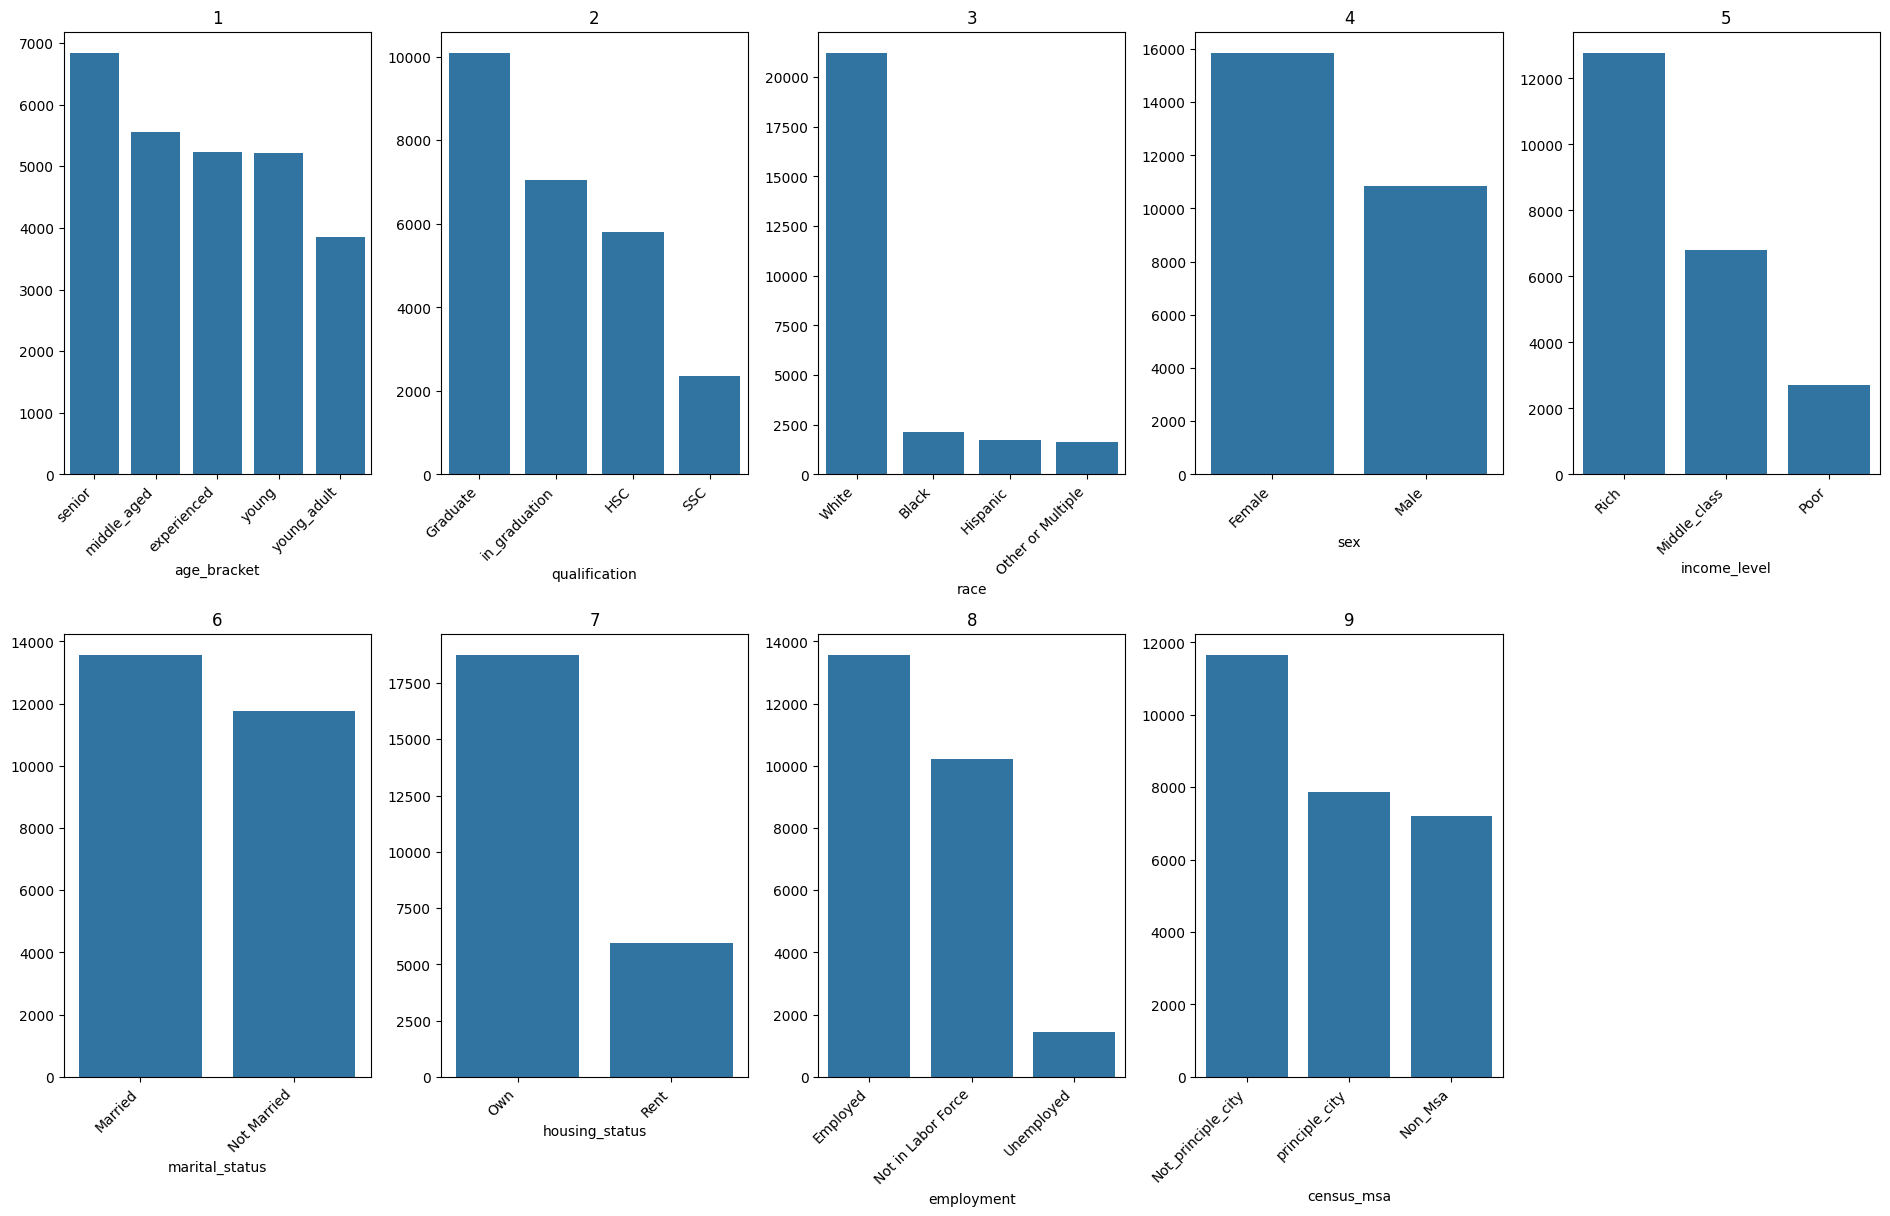

In [16]:
plt.figure(figsize=(19,17))
for i,j in enumerate(cat_col_clean.columns,1):
    plt.subplot(3,5,i)
    ind = cat_col_clean[j].value_counts().index
    val = cat_col_clean[j].value_counts().values
    sns.barplot(x=ind,y=val)
    plt.xticks(rotation=45, ha='right')
    plt.title(i)
plt.tight_layout()

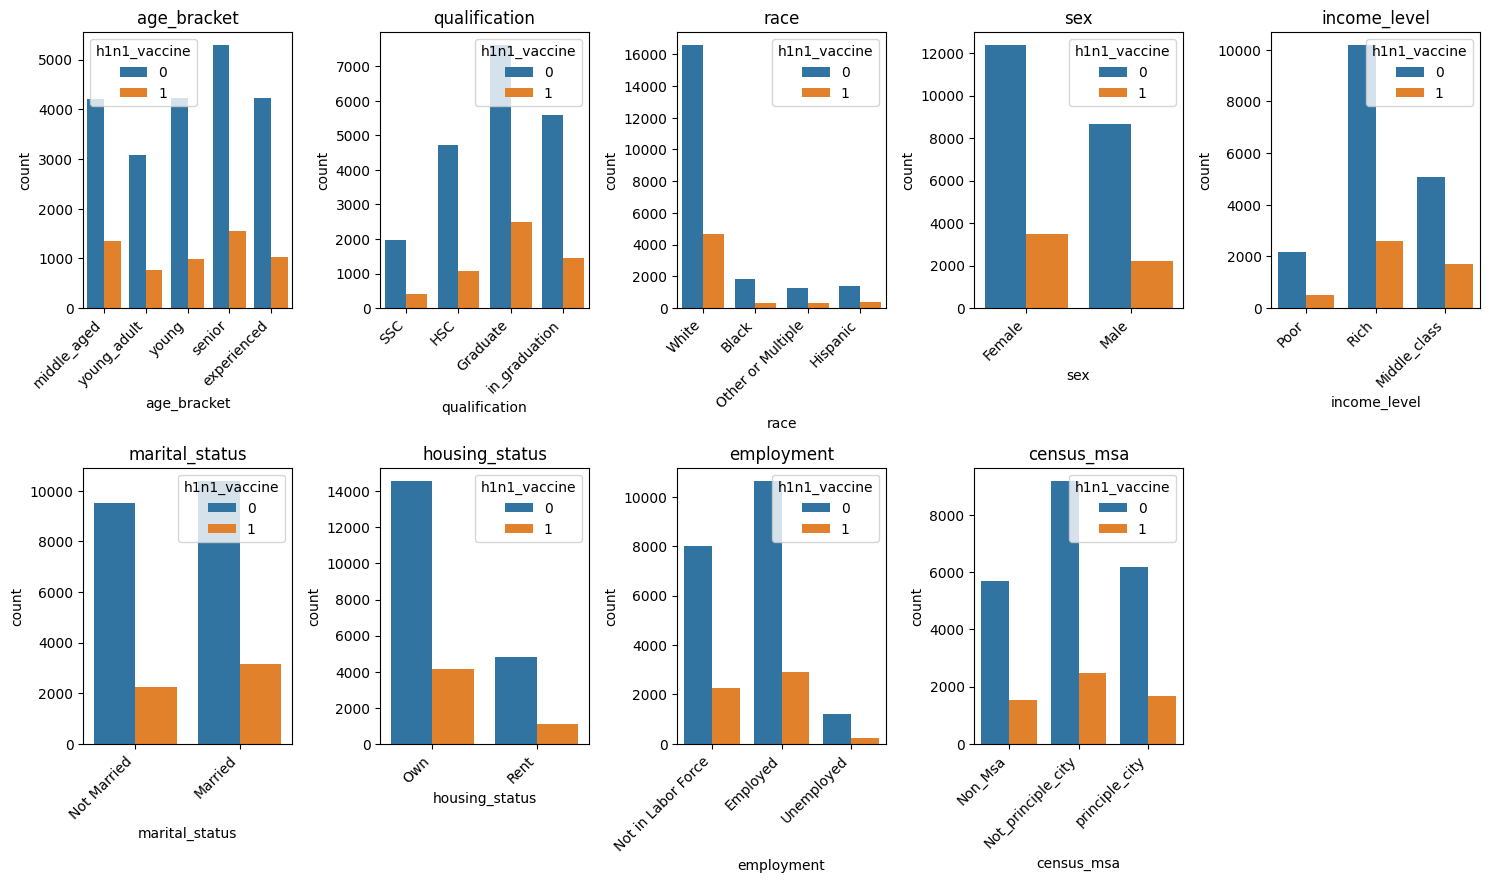

In [17]:
plt.figure(figsize=(15,12)) 
for i, col in enumerate(cat_col_clean, 1):  
    plt.subplot(3, 5, i) 
    sns.countplot(data=data, x=col, hue='h1n1_vaccine')
    plt.xticks(rotation=45, ha='right')
    plt.title(col)
    plt.tight_layout()  

plt.show()  


In [ ]:
plt.figure(figsize=(15,12))
for i,j in enumerate(num_col.columns,1):
    plt.subplot(5,5,i)
    ind = num_col[j].value_counts().index
    val = num_col[j].value_counts().values
    sns.barplot(x=ind,y=val)
    plt.xticks(rotation=45, ha='right')
    plt.title(j)
plt.tight_layout()
    

In [ ]:
plt.figure(figsize=(15,12)) 
for i, col in enumerate(num_col, 1):  
    plt.subplot(5, 5, i) 
    sns.countplot(data=data, x=col, hue='h1n1_vaccine')
    plt.xticks(rotation=45, ha='right')
    plt.title(col)
    plt.tight_layout()  

plt.show()  


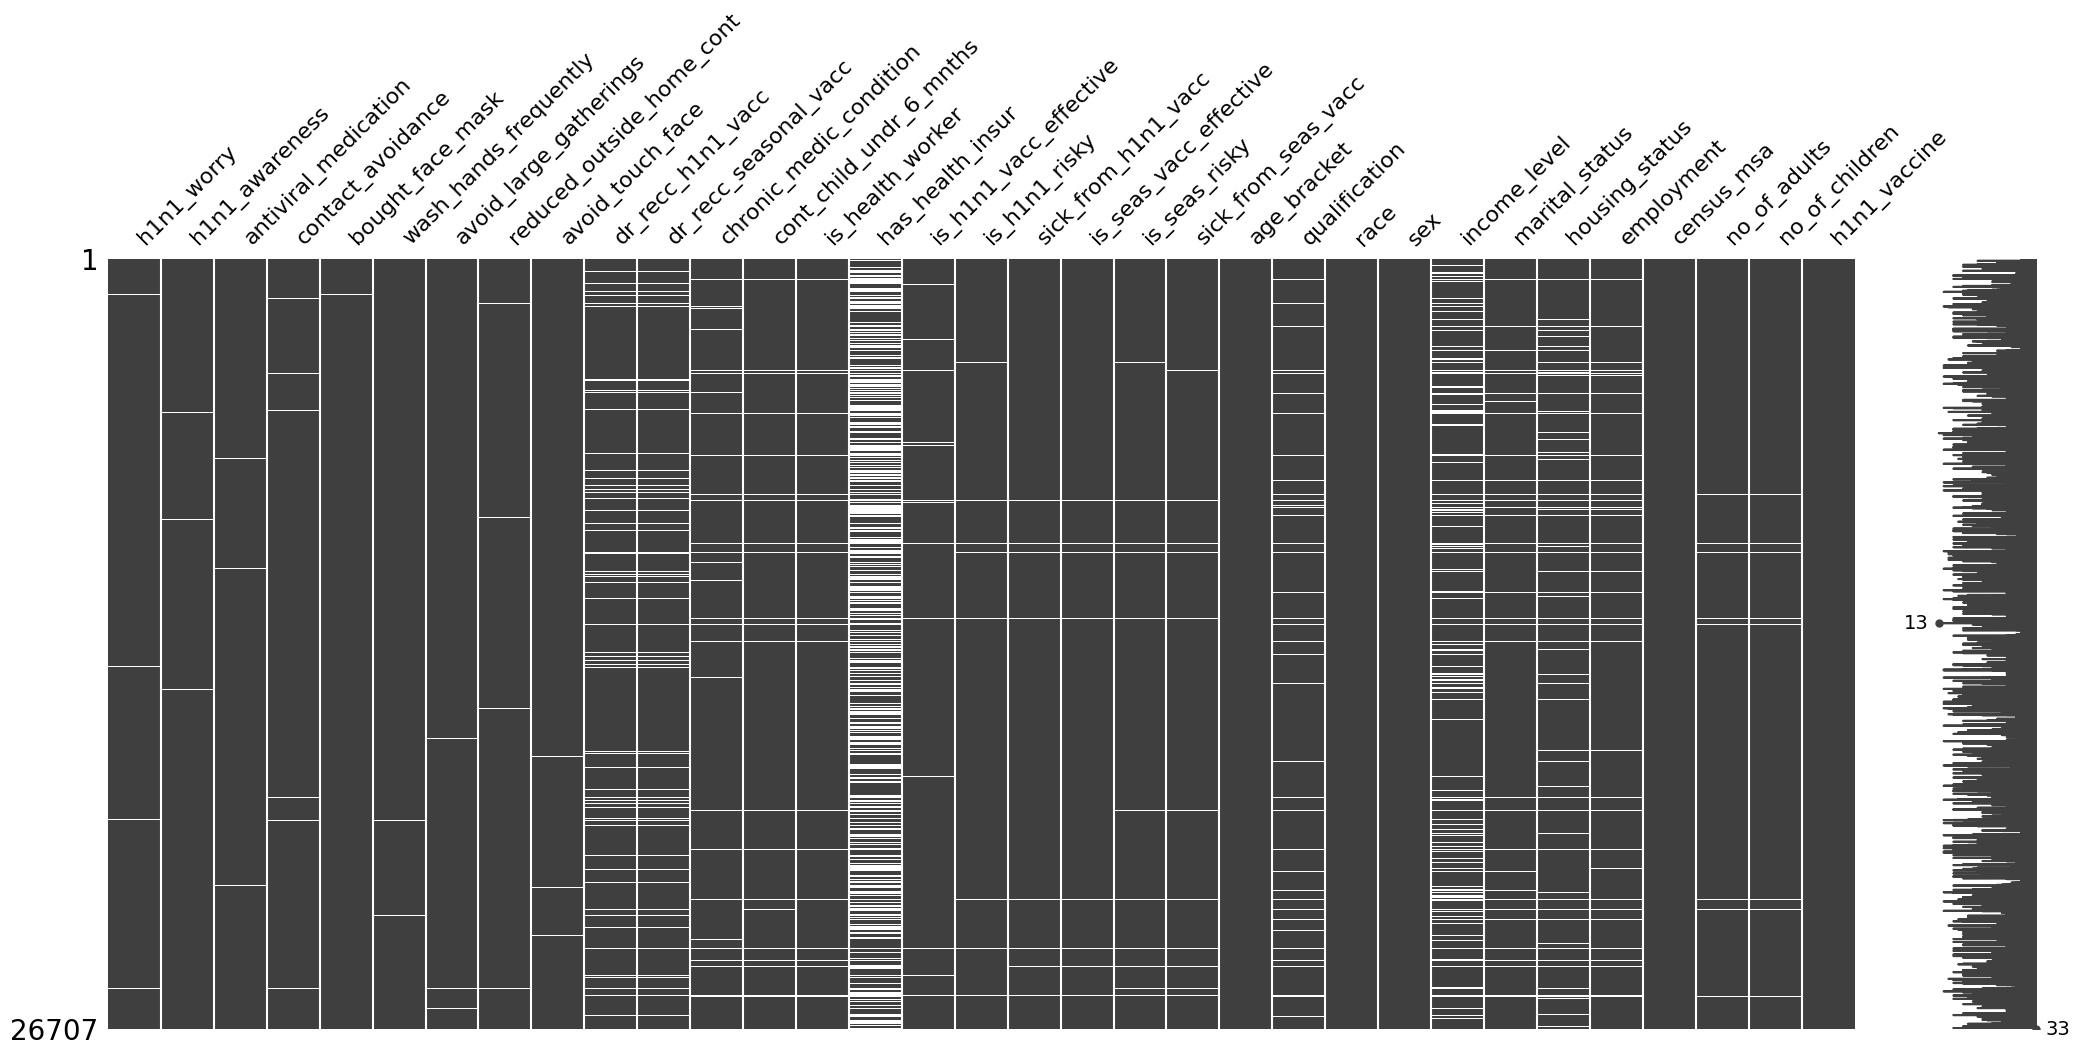

In [22]:
import missingno as msno
msno.matrix(data)
plt.show()

- column wihich has more white lines have more missing values

# filiing missing values

In [54]:
data.drop(columns='has_health_insur',inplace=True)

In [55]:
for col in data.columns:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [56]:
data.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

# convert dtypes to int

In [57]:
data = data.astype({col: 'int' for col in data.select_dtypes(include=['float']).columns})

In [58]:
data.dtypes

h1n1_worry                    int32
h1n1_awareness                int32
antiviral_medication          int32
contact_avoidance             int32
bought_face_mask              int32
wash_hands_frequently         int32
avoid_large_gatherings        int32
reduced_outside_home_cont     int32
avoid_touch_face              int32
dr_recc_h1n1_vacc             int32
dr_recc_seasonal_vacc         int32
chronic_medic_condition       int32
cont_child_undr_6_mnths       int32
is_health_worker              int32
is_h1n1_vacc_effective        int32
is_h1n1_risky                 int32
sick_from_h1n1_vacc           int32
is_seas_vacc_effective        int32
is_seas_risky                 int32
sick_from_seas_vacc           int32
age_bracket                  object
qualification                object
race                         object
sex                          object
income_level                 object
marital_status               object
housing_status               object
employment                  

# Encoding

In [59]:
# ordnial columns
age_bracket_mapping = {'young_adult': 0, 'young': 1, 'experienced': 2, 'middle_aged': 3, 'senior': 4}
qualification_mapping = {'SSC': 0, 'HSC': 1, 'in_graduation': 2, 'Graduate': 3}
income_level_mapping = {'Poor': 0, 'Middle_class': 1, 'Rich': 2}

data['age_bracket'] = data['age_bracket'].map(age_bracket_mapping)
data['qualification'] = data['qualification'].map(qualification_mapping)
data['income_level'] = data['income_level'].map(income_level_mapping)


In [60]:
# List of categorical columns that need One-Hot Encoding
categorical_columns = ['race', 'sex', 'marital_status', 'housing_status', 'employment', 'census_msa']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  
data_encoded.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,no_of_adults,no_of_children,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,census_msa_Not_principle_city,census_msa_principle_city
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,3,1,2,2,1,2,3,0,0,0,0,0,False,False,True,False,True,False,True,False,False,False
1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,5,4,4,4,2,4,0,1,0,0,0,0,False,False,True,True,True,True,False,False,True,False
2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,3,1,1,4,1,2,1,3,2,2,0,0,False,False,True,True,True,False,False,False,True,False
3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,3,3,5,5,4,1,4,1,0,0,0,0,False,False,True,False,True,True,True,False,False,True
4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,3,3,2,3,1,4,2,2,2,1,0,0,False,False,True,False,False,False,False,False,True,False


In [61]:
data_encoded.shape

(26707, 36)

# SCALING

In [62]:
from sklearn.preprocessing import StandardScaler
binary_columns = [col for col in data_encoded.columns if data_encoded[col].dtype == 'bool']
target_column = 'h1n1_vaccine'  
columns_to_scale = [col for col in data_encoded.columns if col not in binary_columns and col != target_column]
scaler = StandardScaler()
data_encoded[columns_to_scale] = scaler.fit_transform(data_encoded[columns_to_scale])

In [63]:
data_encoded.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,income_level,no_of_adults,no_of_children,h1n1_vaccine,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,census_msa_Not_principle_city,census_msa_principle_city
unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,-0.659437,-0.612735,-0.294992,-0.34895,-0.852660,-1.047610,-0.260383,-1.880528,-1.240062,-0.071970,0.546383,-2.036352,-2.299931,-1.183463,-0.572387,0,False,False,True,False,True,False,True,False,False,False
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,-0.659437,-0.612735,-0.294992,-0.34895,1.146988,1.302012,1.217471,-0.023708,-0.512890,1.433196,-1.602803,-1.036539,-2.299931,-1.183463,-0.572387,0,False,False,True,True,True,True,False,False,True,False
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,-0.659437,1.632027,-0.294992,-0.34895,-0.852660,-1.047610,-0.999310,-0.023708,-1.240062,-0.071970,-0.886407,0.963088,0.681106,1.483323,-0.572387,0,False,False,True,True,True,False,False,False,True,False
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,1.516445,1.632027,-0.294992,-0.34895,-0.852660,0.518805,1.956398,0.904702,0.941455,-0.824553,1.262778,-1.036539,-2.299931,-1.183463,-0.572387,0,False,False,True,False,True,True,True,False,False,True
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,-0.659437,-0.612735,-0.294992,-0.34895,-0.852660,0.518805,-0.260383,-0.952118,-1.240062,1.433196,-0.170012,-0.036725,0.681106,0.149930,-0.572387,0,False,False,True,False,False,False,False,False,True,False


In [64]:
data_encoded.shape

(26707, 36)

# base model building

In [65]:
x = data_encoded.drop(columns='h1n1_vaccine')
y =  data_encoded['h1n1_vaccine']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [67]:
pred = model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



# feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
importances = rf_model.feature_importances_

feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

top_34_features = feature_importance_df['Feature'].head(34)  
x_train_top34 = x_train[top_34_features]
x_test_top34 = x_test[top_34_features]

log_reg_model = LogisticRegression()  
log_reg_model.fit(x_train_top34, y_train)
y_pred_top34 = log_reg_model.predict(x_test_top34)


print(classification_report(y_test, y_pred_top34))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342



# tunning

In [71]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2', 'elasticnet'],  
    'l1_ratio': [0.2, 0.5, 0.8],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(x_train_top34, y_train)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred_best = best_model.predict(x_test_top34)

print(classification_report(y_test, y_pred_best))
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 10, 'l1_ratio': 0.2, 'penalty': 'l1', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.83      5342

Accuracy: 0.8408835642081617


# class balanced

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_top34, y_train)

log_reg_smote = LogisticRegression(C=10, penalty='l1', solver='saga', l1_ratio=0.2, max_iter=5000)
log_reg_smote.fit(x_train_smote, y_train_smote)

y_pred_smote = log_reg_smote.predict(x_test_top34)

print(classification_report(y_test, y_pred_smote))
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote)}")


              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4212
           1       0.50      0.66      0.57      1130

    accuracy                           0.79      5342
   macro avg       0.70      0.74      0.71      5342
weighted avg       0.82      0.79      0.80      5342

Accuracy: 0.7877199550730064
